<a href="https://colab.research.google.com/github/somkiatth/git/blob/master/TU_Copy_of_Name_EDA_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

In [9]:
# import package library
import numpy as np
import pandas as pd
# some imports to set up plotting
import matplotlib.pyplot as plt
import seaborn as sns


ในกรณีที่ใช้ Matplotlib บน Jupyther Notebook หรือ Google Colab อาจจะต้องมีการเพิ่ม Code ด้านล่างลงไปเพื่อให้สามารถแสดงได้ โดยที่ไม่ต้องใช้คำสั่ง plt.show()

In [10]:
%matplotlib inline

ในกรณีใช้ IDE อื่นที่ไม่ใช่ Jupyther Notebook หรือ Google Colab ต้องเพิ่ม plt.show() เมื่อต้องการวาดกราฟออกมาทางหน้าจอ

# 1) นำเข้าข้อมูล
อ่านไฟล์ข้อมูล "churn_telecom.csv"

In [4]:
df=pd.read_csv('churn_telecom.csv')

In [11]:
#ดูตัวอย่างข้อมูล 5 แถวแรก


In [6]:
#ดูข้อมูล 10 แถวสุดท้าย


In [7]:
#สุ่มข้อมูลมา 3 แถว


#2) สำรวจข้อมูล

In [14]:
#ดูรายละเอียดข้อมูล
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [16]:
#เรียกดูชื่อคอลัมน์
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
#ดูชนิดข้อมูล


In [ ]:
#ดูค่าทางสถิติพื้นฐาน


In [ ]:
#ดูค่าทางสถิติพื้นฐานสำหรับข้อมูลที่เป็น object และ bool
df.describe(include=['object',bool])

In [ ]:
#นับจำนวนข้อมูล Churn ในแต่ละค่า
df['Churn'].value_counts()

In [ ]:
#นับจำนวนข้อมูล International plan ในแต่ละค่า


In [ ]:
#ลองทำเอง นับจำนวนข้อมูลแบ่งตาม Voice mail plan


In [ ]:
#Summary tables
pd.crosstab(df['Churn'], df['International plan'])

In [ ]:
#ลองทำเอง ดูจำนวนคน แยกตาม Churn และ แยกตาม State


In [ ]:
#นับค่า Null
df.isnull().sum()

In [ ]:
#pivot table
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

In [ ]:
#ลองทำเอง สร้าง Pivot Table 'Total day calls', 'Total eve calls', 'Total night calls'
#แบ่งตาม Churn


#3) ลบคอลัมน์ที่ไม่ต้องการทิ้ง

In [ ]:
df.columns

In [ ]:
#ลบคอลัมน์ State
df.drop(columns= ['State'], inplace=True)
df.columns

#4) Data Visualization

In [ ]:
#Bar Plot
#Appropriate for lots of values in a categorical variable or discrete numeric variable

sns.countplot(x="Area code", data=df)
plt.title('Number of customers');

In [ ]:
#Comparation (Churn)

sns.countplot(x="Area code", hue='Churn', data=df)
plt.title('Number of customers');

In [ ]:
#ลองทำเอง
#กราฟเปรียบเทียบจำนวนลูกค้าที่ Churn กับ Voice mail plan


In [ ]:
#กราฟเปรียบเทียบจำนวนลูกค้าที่ Churn กับ International plan


In [ ]:
# boxplot ของ Total day minutes

<Axes: >

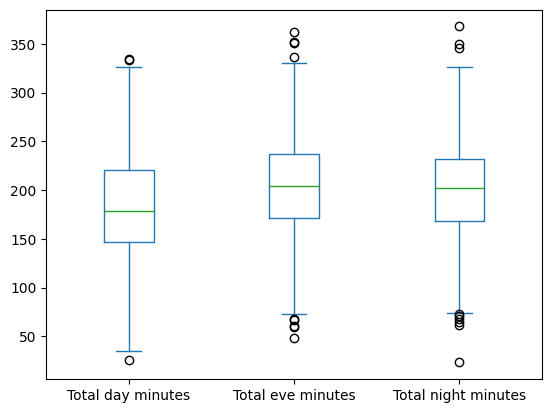

In [ ]:
# boxplot ของ cols

<Axes: >

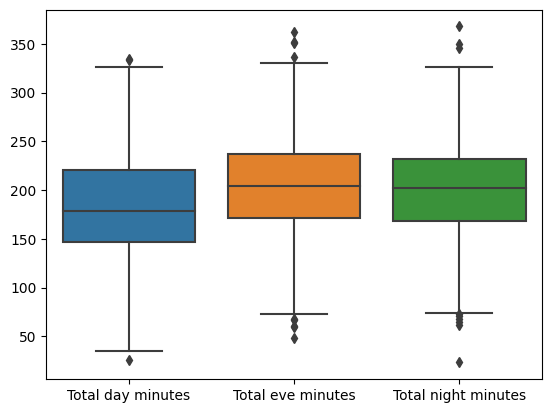

In [ ]:
sns.boxplot([df['Total day minutes'], df['Total eve minutes'], df['Total night minutes']])

In [ ]:
df.hist()

<Axes: >

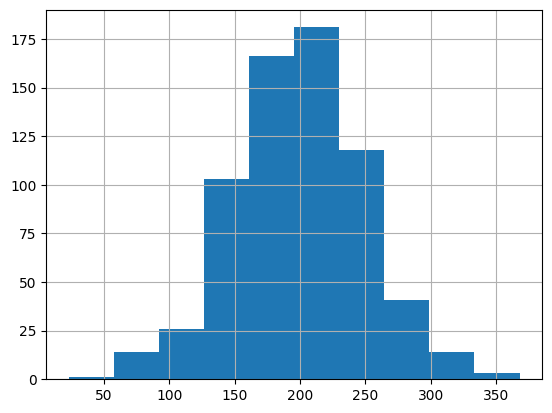

In [ ]:
#Histogram ของ Total night minutes

In [ ]:
#Histogram ของ Total day minutes

In [ ]:
#Histogram ของ Total eve minutes

In [ ]:
cols = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

In [ ]:
#เปรียบเทียบจำนวนนาทีการโทรในช่วงกลางวัน ตอนเย็น และกลางคืน
plt.figure(figsize=(12,6))
sns.distplot( df["Total day minutes"] , color="skyblue",label="Day")
sns.distplot( df["Total eve minutes"] , color="green",label="Evening")
sns.distplot( df["Total night minutes"] , color="orange",label="night")
plt.legend();

In [ ]:
#แบ่งข้อมูลออกเป็น 2 กลุ่ม
df_not_churn=df[df["Churn"]==False]
df_churn=df[df["Churn"]==True]

In [ ]:
#Distribution of Total day minutes, comparing churn and not churn
plt.figure(figsize=(12,6))
sns.distplot( df_not_churn["Total day minutes"] , color="skyblue",label="Not Churn")
sns.distplot( df_churn["Total day minutes"] , color="red",label="Churn")
plt.legend();

In [ ]:
#Distribution of Total eve minutes, comparing churn and not churn


In [ ]:
#Distribution of Total night minutes, comparing churn and not churn



##Exercise
**แล้วถ้าอยากรู้ว่าลูกค้าที่เป็น Internation Plan มีลักษณะการโทรต่างกับลูกค้าธรรมดาอย่างไร จะ Plot อย่างไรดี ???**

In [ ]:
#สร้าง Data Frame แยก Internationa plan กับธรรมดา


In [ ]:
#Distribution of Total day minutes, comparing by International plan


In [ ]:
#Distribution of Total eve minutes, comparing by International plan


In [ ]:
#Distribution of Total night minutes, comparing by International plan
